In [47]:
import numpy as np 
import pandas as pd
import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [46]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
data = pd.DataFrame(X, columns=iris.feature_names) 
data['species'] = [iris.target_names[i] for i in y] #if it is assigned directly to y it give in numerical number 0,1,2 
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [39]:
print(data.shape)

(150, 5)


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [70]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Log Sepal Length (cm)
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.916064
std,0.828066,0.435866,1.765298,0.762238,0.120352
min,4.300000,2.000000,1.000000,0.100000,1.667707
25%,5.100000,2.800000,1.600000,0.300000,1.808289
50%,5.800000,3.000000,4.350000,1.300000,1.916923
75%,6.400000,3.300000,5.100000,1.800000,2.001480
max,7.900000,4.400000,6.900000,2.500000,2.186051


In [48]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

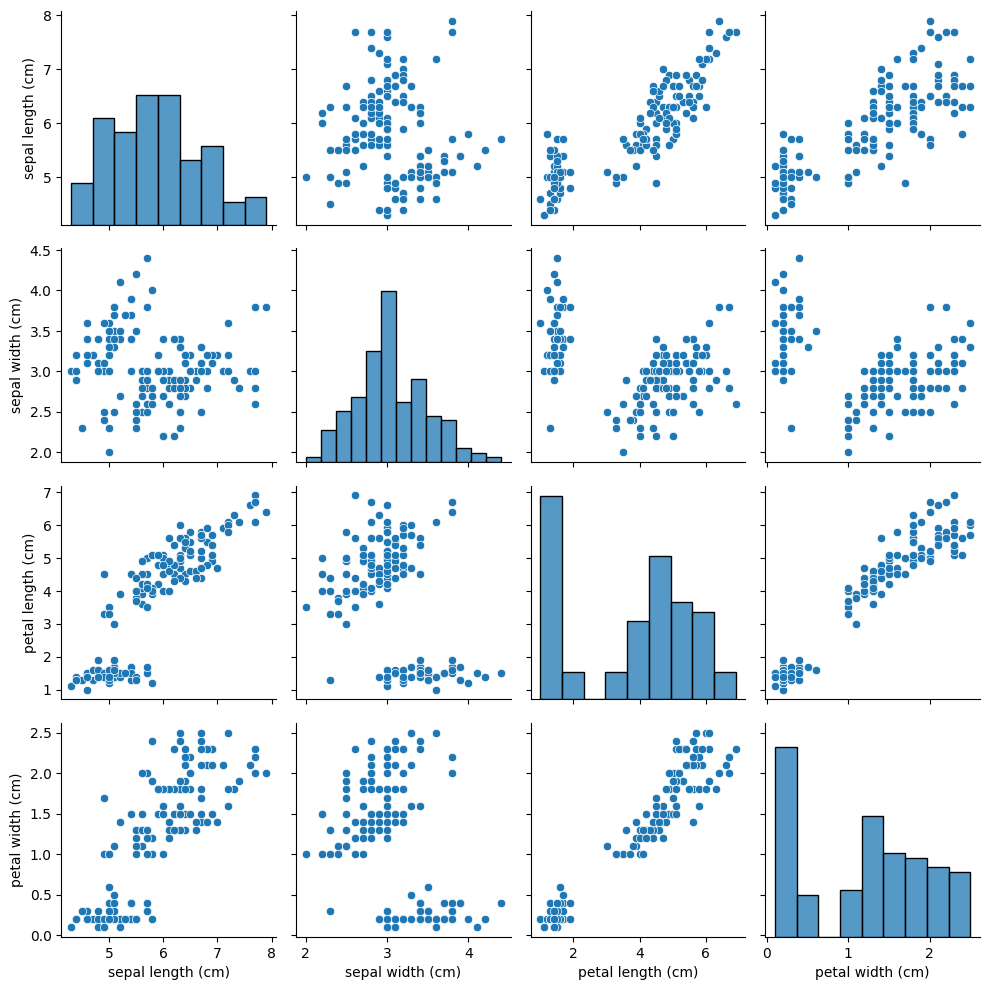

In [43]:
sns.pairplot(data, height=2.5)
plt.tight_layout()

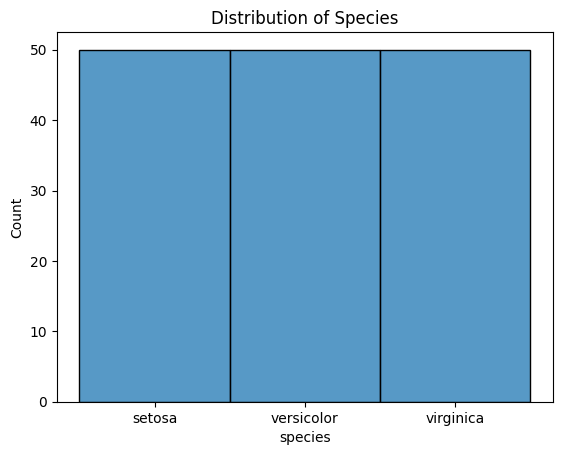

In [44]:
sns.histplot(data['species'],)
plt.title('Distribution of Species')
plt.show()

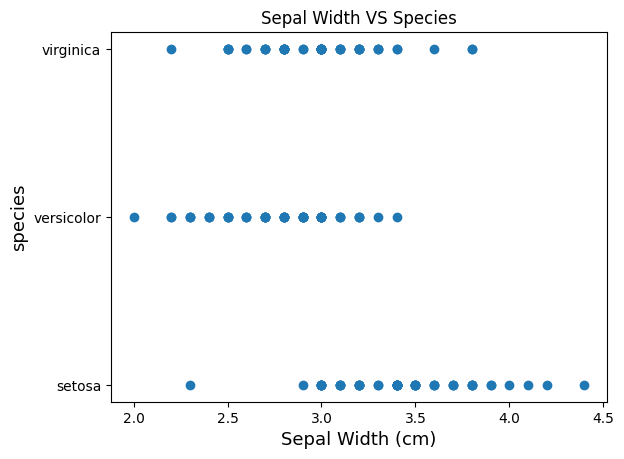

In [69]:
fig, ax = plt.subplots()
ax.scatter(x = data['sepal width (cm)'], y = data['species'])
plt.ylabel('species', fontsize=13)
plt.xlabel('Sepal Width (cm)', fontsize=13)
plt.title('Sepal Width VS Species')
plt.show()

In [50]:
# skewness and kurtosis is for numerical data
print("Skewness of sepal length: %f" % data['sepal length (cm)'].skew())
print("Kurtosis of sepal length: %f" % data['sepal length (cm)'].kurt())


Skewness of sepal length: 0.314911
Kurtosis of sepal length: -0.552064


In [51]:
# Frequency counts of each species
species_counts = data['species'].value_counts()
print(species_counts)


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


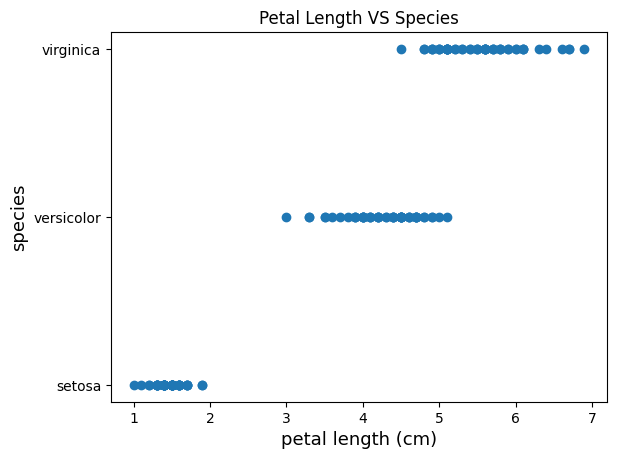

In [52]:
fig, ax = plt.subplots()
ax.scatter(x = data['petal length (cm)'], y = data['species'])
plt.ylabel('species', fontsize=13)
plt.xlabel('petal length (cm)', fontsize=13)
plt.title('Petal Length VS Species')
plt.show()


 mu = 5.84 and sigma = 0.83



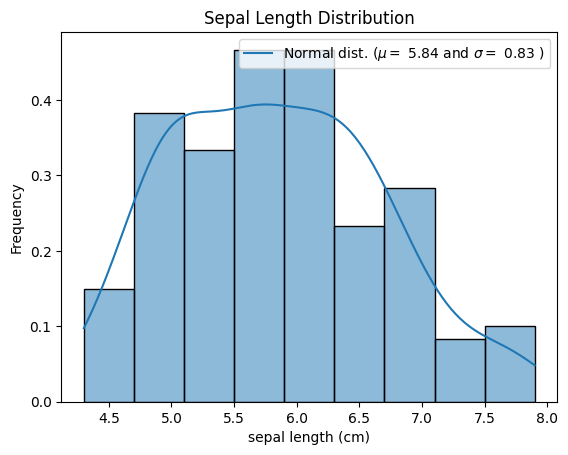

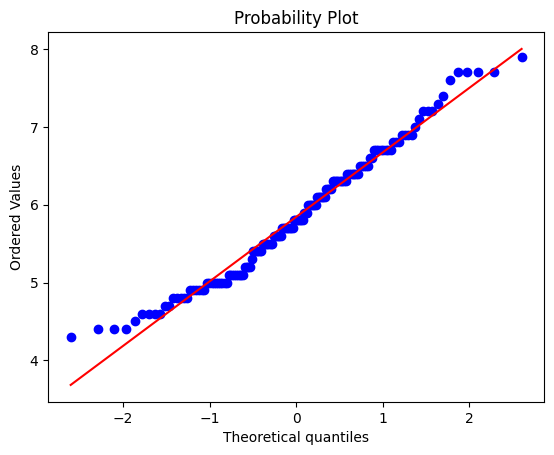

In [53]:
from scipy import stats
from scipy.stats import norm, skew

sns.histplot(data['sepal length (cm)'], kde=True, stat="density")

(mu, sigma) = norm.fit(data['sepal length (cm)'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

plt.ylabel('Frequency')
plt.title('Sepal Length Distribution')

fig = plt.figure()
res = stats.probplot(data['sepal length (cm)'], plot=plt)
plt.show()



 mu = 1.92 and sigma = 0.12



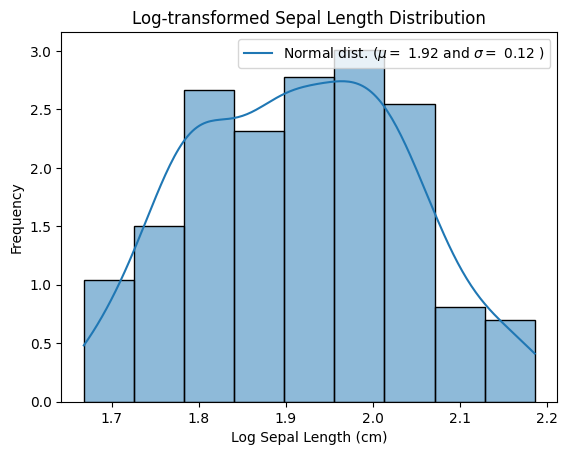

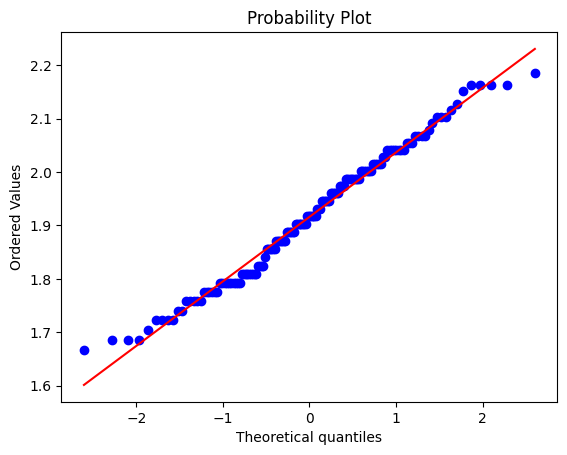

In [54]:

data["Log Sepal Length (cm)"] = np.log1p(data["sepal length (cm)"])

sns.histplot(data['Log Sepal Length (cm)'], kde=True, stat="density")

(mu, sigma) = norm.fit(data['Log Sepal Length (cm)'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Add legend, labels, and title
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Log-transformed Sepal Length Distribution')

# Q-Q plot to assess normality
fig = plt.figure()
res = stats.probplot(data['Log Sepal Length (cm)'], plot=plt)
plt.show()

In [65]:
# Calculate the correlation matrix for numerical features
correlation_matrix = data.drop('species', axis=1).corr()
print(correlation_matrix)


                       sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)               1.000000         -0.117570           0.871754   
sepal width (cm)               -0.117570          1.000000          -0.428440   
petal length (cm)               0.871754         -0.428440           1.000000   
petal width (cm)                0.817941         -0.366126           0.962865   
Log Sepal Length (cm)           0.997719         -0.126618           0.878098   

                       petal width (cm)  Log Sepal Length (cm)  
sepal length (cm)              0.817941               0.997719  
sepal width (cm)              -0.366126              -0.126618  
petal length (cm)              0.962865               0.878098  
petal width (cm)               1.000000               0.827186  
Log Sepal Length (cm)          0.827186               1.000000  


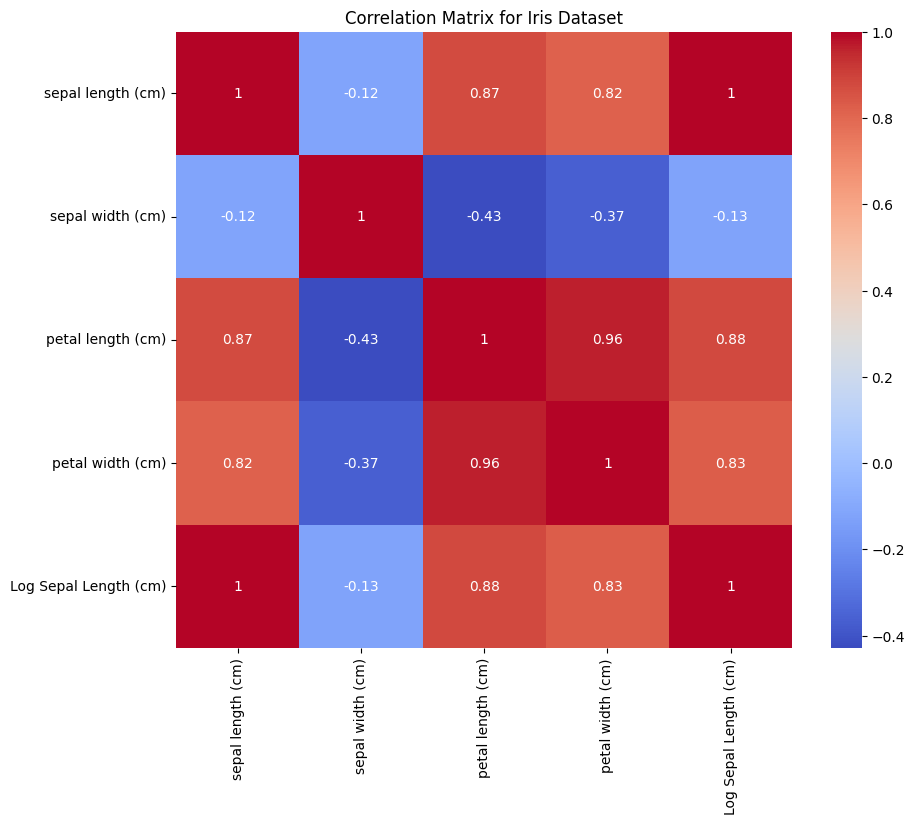

In [66]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix for Iris Dataset')
plt.show()

In [57]:

# Calculate the absolute correlation of features with the target ('species')
cor_target = abs(cor["species"])

# Select features highly correlated with the target based on a threshold, e.g., 0.2
relevant_features = cor_target[cor_target > 0.2]

# Get the names of the features
names = [index for index, value in relevant_features.items()]  
names.remove('species')

print(names)
print(len(names))


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'Log Sepal Length (cm)']
5


In [58]:

from sklearn.model_selection import train_test_split

# Assuming you have the Iris dataset loaded as 'data'
X = data.drop("species", axis=1)  # Features (drop the target column)
y = data["species"]  # Target (species)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 5)
(30, 5)
(120,)
(30,)


In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=200)

# Train the model
lr.fit(X_train, y_train)

# Make predictions on the test set
predictions = lr.predict(X_test)

# Print actual and predicted species for the first instance in the test set
print("Actual species of the iris flower:", y_test.iloc[0])
print("Model predicted species:", predictions[0])

Actual species of the iris flower: versicolor
Model predicted species: versicolor


In [61]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of the Logistic Regression model:", accuracy)

Accuracy of the Logistic Regression model: 1.0
